# Handling categorical variables

link: https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

The attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC)

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
print(data.shape)
print(data.info())
data.head()

(2111, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                    

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female 21.00    1.62   64.00                            yes   no  2.00   
1  Female 21.00    1.52   56.00                            yes   no  3.00   
2    Male 23.00    1.80   77.00                            yes   no  2.00   
3    Male 27.00    1.80   87.00                             no   no  3.00   
4    Male 22.00    1.78   89.80                             no   no  2.00   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0 3.00  Sometimes    no  2.00   no 0.00 1.00          no   
1 3.00  Sometimes   yes  3.00  yes 3.00 0.00   Sometimes   
2 3.00  Sometimes    no  2.00   no 2.00 1.00  Frequently   
3 3.00  Sometimes    no  2.00   no 2.00 0.00  Frequently   
4 1.00  Sometimes    no  2.00   no 0.00 0.00   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

check if nulls:

In [4]:
null_va = list(data.isnull().sum()[data.isnull().sum()>0].index)
print(f"Variables con nulos = {len(null_va)} {','.join(null_va)}")

Variables con nulos = 0 


Explore data

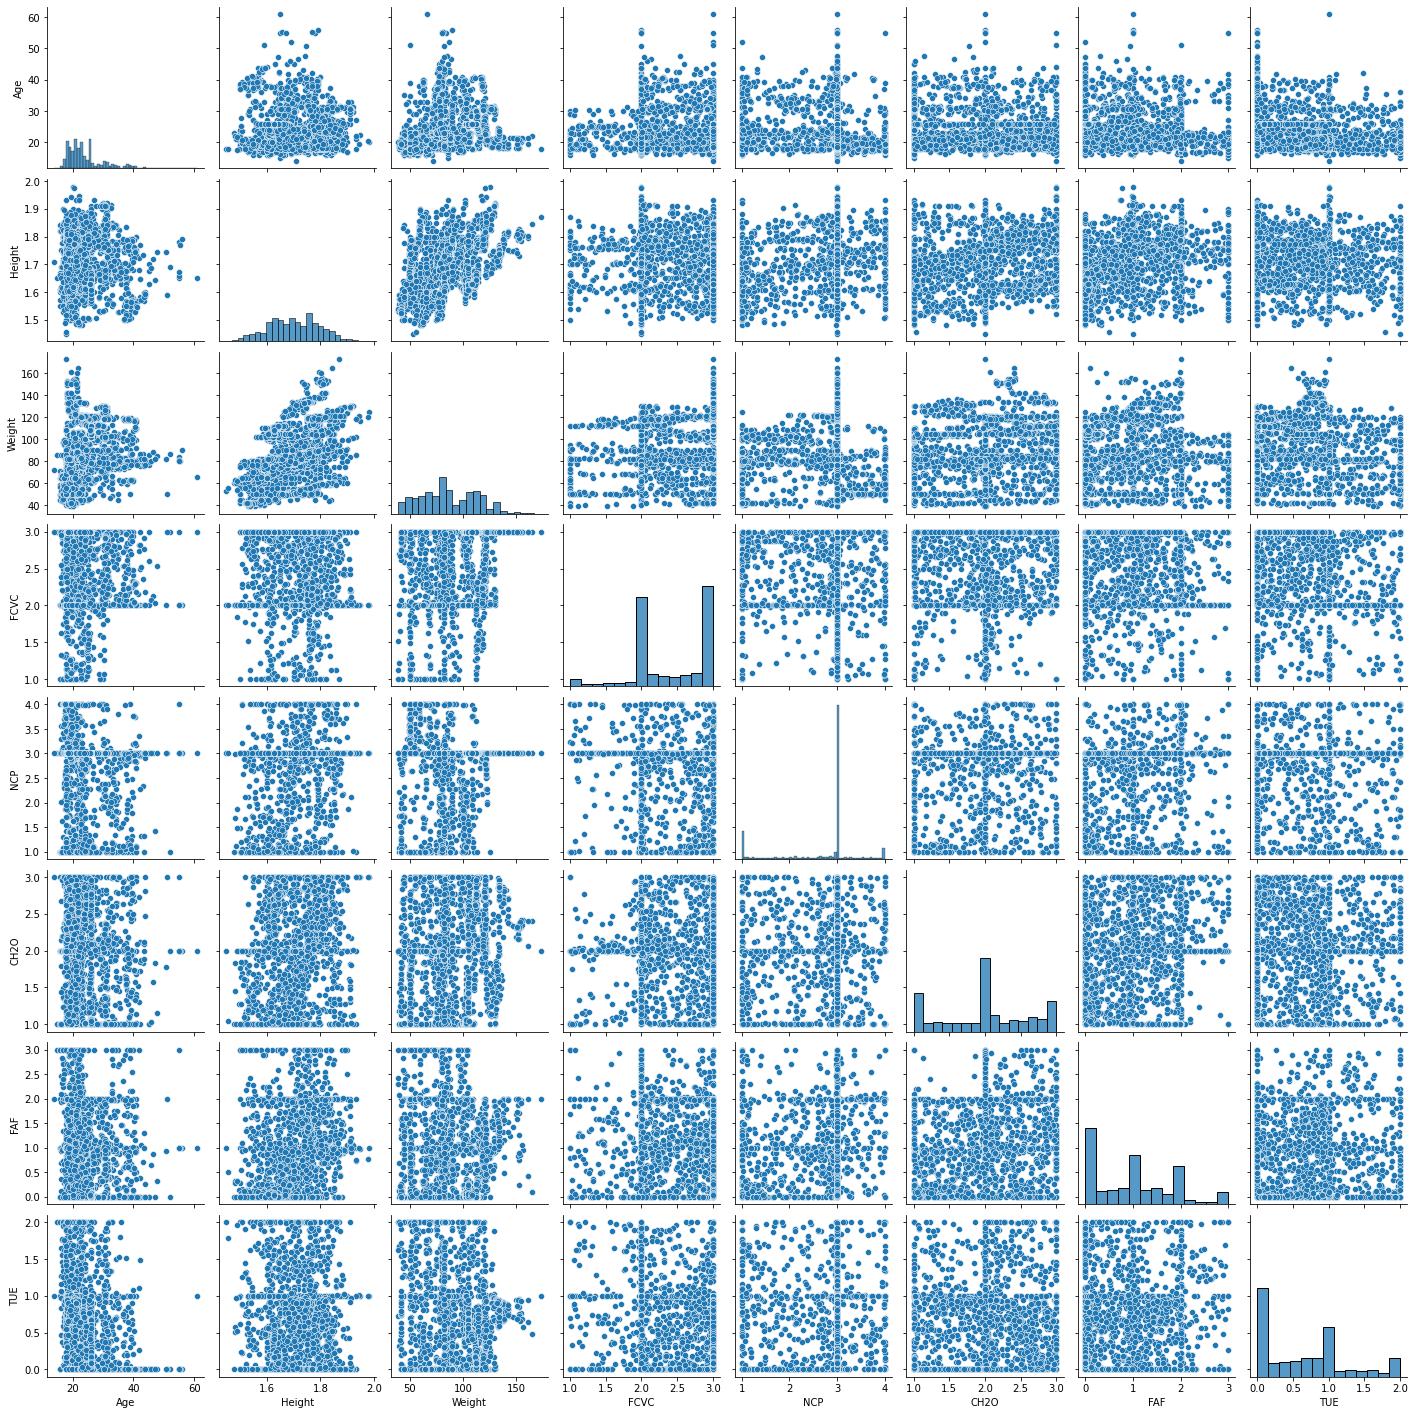

In [8]:
sns.pairplot(data, aspect=1)

In [27]:
print("Distribution of data types:", dict(data.dtypes.value_counts()),"\n")
cols_cat = list(data.dtypes[data.dtypes=="object"].index)
print("Categorical variables: ", len(data.dtypes[data.dtypes=="object"]), 'vars ... ', ', '.join(cols_cat))

for c in cols_cat:
    print(c,": ", dict(data[c].value_counts()))

Distribution of data types: {dtype('O'): 9, dtype('float64'): 8} 

Categorical variables:  9 vars ...  Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad
Gender :  {'Male': 1068, 'Female': 1043}
family_history_with_overweight :  {'yes': 1726, 'no': 385}
FAVC :  {'yes': 1866, 'no': 245}
CAEC :  {'Sometimes': 1765, 'Frequently': 242, 'Always': 53, 'no': 51}
SMOKE :  {'no': 2067, 'yes': 44}
SCC :  {'no': 2015, 'yes': 96}
CALC :  {'Sometimes': 1401, 'no': 639, 'Frequently': 70, 'Always': 1}
MTRANS :  {'Public_Transportation': 1580, 'Automobile': 457, 'Walking': 56, 'Motorbike': 11, 'Bike': 7}
NObeyesdad :  {'Obesity_Type_I': 351, 'Obesity_Type_III': 324, 'Obesity_Type_II': 297, 'Overweight_Level_I': 290, 'Overweight_Level_II': 290, 'Normal_Weight': 287, 'Insufficient_Weight': 272}
